## Regressão Múltipla: Adicionando Mais Variáveis ao Modelo

Sendo o ajuste do modelo anterior parcial vamos buscar aprimorar o mdeolo adicionando mais variáveis preditoras. Vamos, entretanto, ainda nos atermos a entradas numéricas no modelo.

## Exemplo regressão multipla com dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


(3276, 10)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<Axes: >

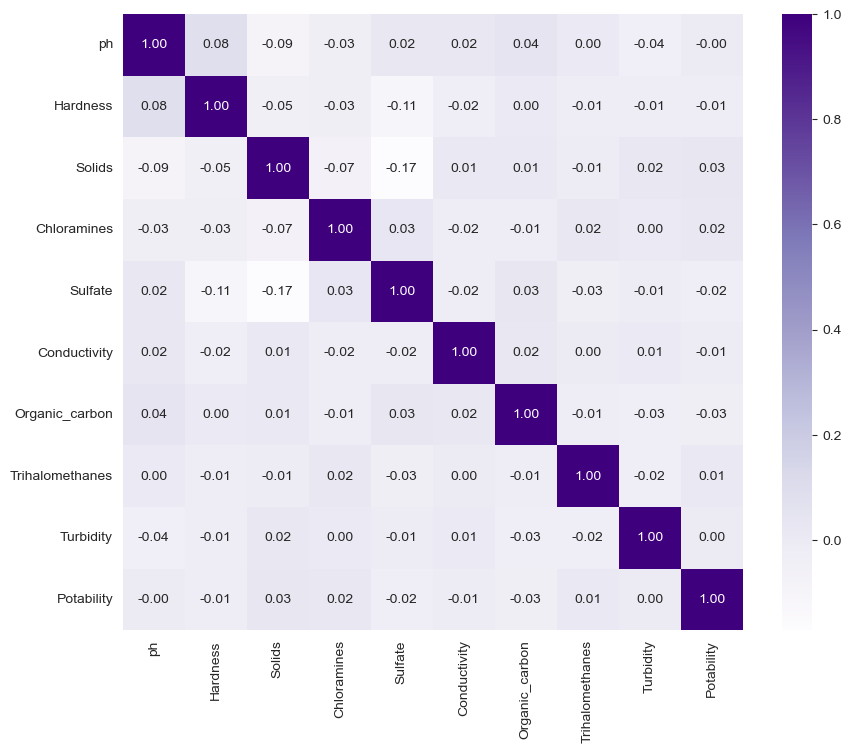

In [48]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


df = pd.read_csv(r'C:\Users\Giovanni\Documents\FACULDADE\SEMESTRE 4\Calculo Numerico\scientificProject\water_potability.csv', header=(0))
# df = df.dropna(axis=0, how='any')
display(df)
display(df.shape)
display(df.columns)
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Purples')

24681.838898691793
[-14.10636693]
O modelo é: y = 24681.839 + (-14.106)x


C:\Users\Giovanni\AppData\Local\Temp\ipykernel_23052\3682970849.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("O modelo é: y = %.3f + (%.3f)x" %(modelo.intercept_, modelo.coef_))


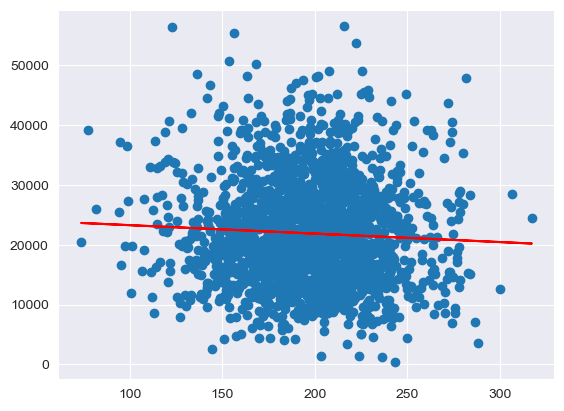

In [49]:
df = df.dropna(axis=0, how='any')
# y é a coluna 1
y = df['Solids']
# x vai da coluna 0 até a coluna 2.
x = df['Hardness']
X = np.array(x).reshape(-1, 1)
y = np.array(y)
modelo = LinearRegression().fit(X, y)
print(modelo.intercept_)
print (modelo.coef_)
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
print("O modelo é: y = %.3f + (%.3f)x" %(modelo.intercept_, modelo.coef_))


import seaborn as sns
import statsmodels.formula.api as sm
model = sm.ols(formula='Solids ~ Hardness', data=df)

In [50]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Solids   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.717
Date:                Wed, 02 Oct 2024   Prob (F-statistic):             0.0169
Time:                        20:38:51   Log-Likelihood:                -21079.
No. Observations:                2011   AIC:                         4.216e+04
Df Residuals:                    2009   BIC:                         4.217e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.468e+04   1172.080     21.058      0.0

In [51]:
model = sm.ols(formula="Chloramines ~ Sulfate+Conductivity+Organic_carbon", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Chloramines   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9292
Date:                Wed, 02 Oct 2024   Prob (F-statistic):              0.426
Time:                        20:38:51   Log-Likelihood:                -3777.6
No. Observations:                2011   AIC:                             7563.
Df Residuals:                    2007   BIC:                             7586.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.4459      0.374     19.

In [52]:
model = sm.ols(formula="ph ~ Hardness+Solids+Chloramines-1", data=df)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     ph   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          1.082e+04
Date:                Wed, 02 Oct 2024   Prob (F-statistic):                        0.00
Time:                        20:38:51   Log-Likelihood:                         -3981.2
No. Observations:                2011   AIC:                                      7968.
Df Residuals:                    2008   BIC:                                      7985.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

## Inspeção Visual da Regressão Múltipla

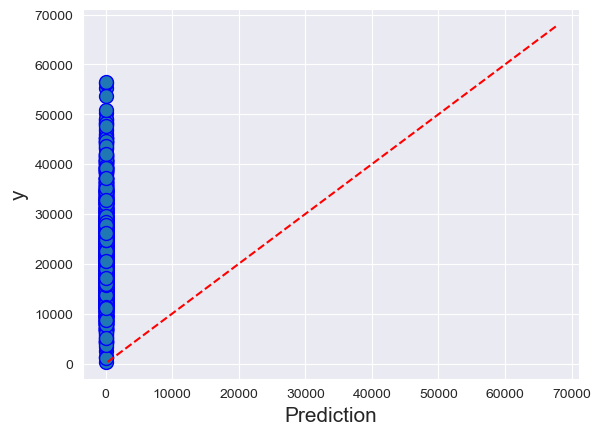

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)

yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)



In [54]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print('R2:', R2)


R2: -6.430749550373042


## Exemplo com sm.ols estimação

In [55]:
df = pd.read_csv('iris.csv', header=(0))

In [56]:
# eliminar o ponto no nome das columas para usar o sm.ols
df.columns = [ x.replace('.','') for x in df.columns ]

In [57]:
model = sm.ols(formula="petalwidth ~ sepallength+sepalwidth+petallength", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             petalwidth   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     734.4
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           7.83e-88
Time:                        20:38:51   Log-Likelihood:                 36.751
No. Observations:                 150   AIC:                            -65.50
Df Residuals:                     146   BIC:                            -53.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2403      0.178     -1.347      

A inspeção visal agora não é mais possível mas podemos analisar as métricas do modelo. O modelo agora apresenta um resultado melhor, mas ainda assim parcial. 

$$ \bar{R}^2 = 0.689 $$
$$ p-values > 0.05 $$

O $\bar{R}^2$, ajustado, ainda é bastante inferior a $0.8$ (um valor a partir do qual as predições começam a ficar interessantes) e ainda existem estimadores não sigficantes, incluindo o `intercept`. Um modelo melhor pode ser obtido, então, empregando-se somente os estimadores relevante, e empregamos o $-1$ na fórmula para excluir o `intercept` do modelo. 

In [58]:
model = sm.ols(formula="petalwidth ~ sepallength+sepalwidth+petallength-1", data=df)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:             petalwidth   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2671.
Date:                Wed, 02 Oct 2024   Prob (F-statistic):                   5.99e-128
Time:                        20:38:51   Log-Likelihood:                          35.824
No. Observations:                 150   AIC:                                     -65.65
Df Residuals:                     147   BIC:                                     -56.62
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Adicionando Variáveis Categóricas

O pacote `statsmodel` permite empregar variáveis categóricas diretamente. Como o cálculo dos coeficientes requer atributos numéricos o pacote transforma esses atributos internamente fazendo o *hot encode* dos dados.

In [59]:
model = sm.ols(formula="petalwidth ~ variety+sepallength+sepalwidth+petallength-1", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             petalwidth   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     594.9
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           3.03e-94
Time:                        20:38:51   Log-Likelihood:                 59.030
No. Observations:                 150   AIC:                            -106.1
Df Residuals:                     144   BIC:                            -88.00
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
variety[Setosa]        -0.4731    

Por exemplo, ao incluir o atributo categórico variety, que possui valores setosa, versicolor e virginica, o pacote cria as variáveis binárias (hot encode) para serem empregadas no modelo. Aqui o modelo apresentou um resultado pior que o modelo anterior, mas seu objetivo aqui é apenas de mostrar o uso de atributos categóricos em um modelo de regressão.

O uso de variáveis categóricas é muito importante em várias aplicações de modelos de regressão e você pode, por exemplo, pensar na importância de um atributo categórico como bairro ou marca para a estimativa de preços de imóveis ou veículos.

# Coeficiente de correlação linear de um dataset

In [60]:
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Purples')

ValueError: could not convert string to float: 'Setosa'